In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

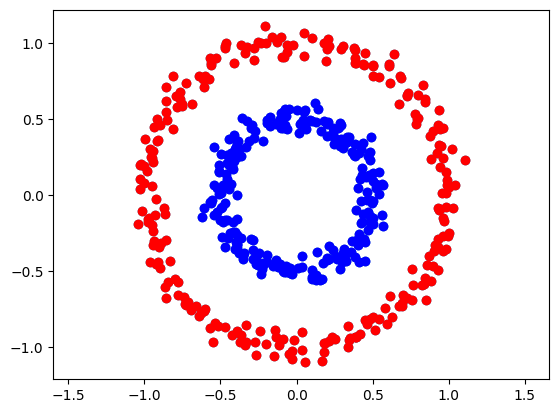

In [13]:
# Generar conjunto de datos
n = 500 # Número de puntos
p = 2 # Número de características

X, y = make_circles(n_samples=n, factor=0.5, noise=0.05) # Crear datos en forma de círculos
y = y[: , np.newaxis] # Añadir dimensión extra a y para que tenga la misma forma que X
plt.scatter(X[:,0], X[:,1]) # Mostrar datos en un gráfico de dispersión
#print(y)

plt.scatter(X[y[:,0]==0,0], X[y[:,0]==0,1], color='red')
plt.scatter(X[y[:,0]==1,0], X[y[:,0]==1,1], color='blue')
plt.axis('equal')
plt.show()

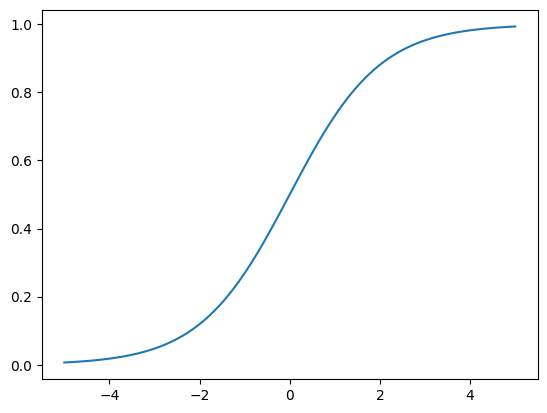

In [14]:
# Definición capa neuronal
class neural_layer():
    def __init__(self, n_conn, n_neur, act_func):
        self.act_func = act_func
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
        
# Funciones de activación
sigm = (lambda x: 1 / (1 + np.e ** (-x)),lambda x: x * (1 - x))
relu = (lambda x: np.maximum(0, x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))
plt.show()

In [15]:
# Crear las capas de la red neuronal
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

In [16]:
# Función para crear la red neuronal
def create_nn(topology, act_func):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_func))
    return nn

topology = [2, 4, 8, 16, 8, 4, 1]
create_nn(topology, sigm)

# Redefinición de topologia (final)
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

# Función de coste
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), lambda Yp, Yr: (Yp - Yr))

# Función de entrenamiento
def train(neural_net, X, y, l2_cost, lr=0.5, train=True):
    out = [(None, X)]
    # Forward pass (propagación hacia adelante)
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_func[0](z)
        out.append((z, a))
    #print(l2_cost[0](out[-1][1], y))
    if train:
        # Backward pass (retropropagación)
        deltas = []
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_func[1](a))
            else:
                deltas.insert(0, deltas[0] @ neural_net[l+1].W.T * neural_net[l].act_func[1](a))
            _W = neural_net[l].W
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    return out[-1][1]

In [17]:
# Prueba de entrenamiento
train(neural_net, X, y, l2_cost, 0.5)
print('')

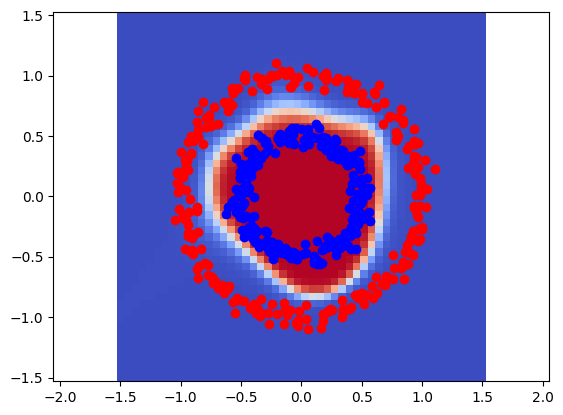

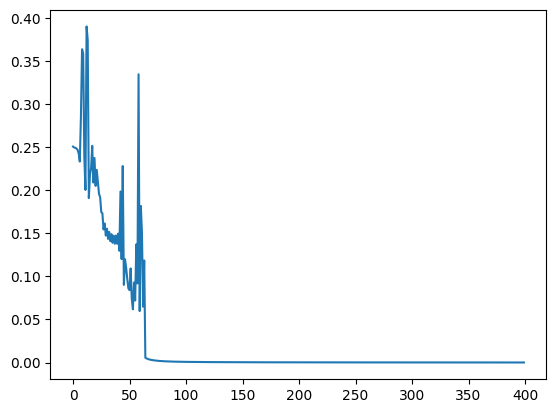

In [18]:
# Entrenamiento y visualización
import time
from IPython.display import clear_output

neural_net = create_nn(topology, sigm)
loss = []

for i in range(10000):
    pY = train(neural_net, X, y, l2_cost, lr=0.03)
    if i % 25 == 0:
        loss.append(l2_cost[0](pY, y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), y, l2_cost, train=False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        plt.axis('equal')
        plt.scatter(X[y[:,0]==0,0], X[y[:,0]==0,1], color='red')
        plt.scatter(X[y[:,0]==1,0], X[y[:,0]==1,1], color='blue')
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)